#A Breakdown of Comp Attendance and Success in Week Three

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 
import pickle
import numpy as np
import pandas as pd
import tbapy
import DatabaseGen as DBG

In [2]:
data = pd.read_pickle("week3" + ".p")

## Number of teams

In [3]:
total_teams = len(data)
total_teams

431

## Number of teams who were picked

In [4]:
total_teams_picked = len(data[data['final'] == True])
total_teams_picked

192

## Number of teams who had been to more then one comp

In [5]:
prev_comp = len(data[data['num_comps'] >= 1])
prev_comp

198

## Number of teams who had been to more then one comp and were picked

In [6]:
prev_comp_and_pick = len(data[(data['final'] == True) & (data['num_comps'] >= 1)])
prev_comp_and_pick

140

## Number of teams who had not been to more then one comp

In [7]:
not_prev_comp = len(data[data['num_comps'] == 0])
not_prev_comp

233

## Number of teams who had not been to more then one comp and were picked

In [8]:
not_prev_comp_and_pick = len(data[(data['final'] == True) & (data['num_comps'] == 0)])
not_prev_comp_and_pick

52

# 45% of teams got picked 

In [9]:
total_teams_picked/total_teams*100

44.5475638051044

# 22% of teams who had not already been to a comp got picked 

In [10]:
not_prev_comp_and_pick/not_prev_comp*100

22.317596566523605

# 71% of teams who had already been to a comp got picked 

In [11]:
prev_comp_and_pick/prev_comp*100

70.70707070707071

# 73% of teams who got picked had already been to a comp

In [12]:
prev_comp_and_pick/total_teams_picked*100

72.91666666666666

# The average age of teams who got picked was 8.7 years

In [13]:
sum(data[data['final'] == True]['rookie_year'])/len(data[data['final'] == True])

8.7083333333333339

In [14]:
data.loc['frc4924']

rookie_year              3
team_number           4924
ccwms             0.778301
dprs                67.577
oprs               68.3553
final                False
num_comps                0
last_num_comps           1
last_opr_comps     18.8979
opr_comps                0
gears              2.49848
rope               1.33226
mean_prev_opr      39.4877
Name: frc4924, dtype: object

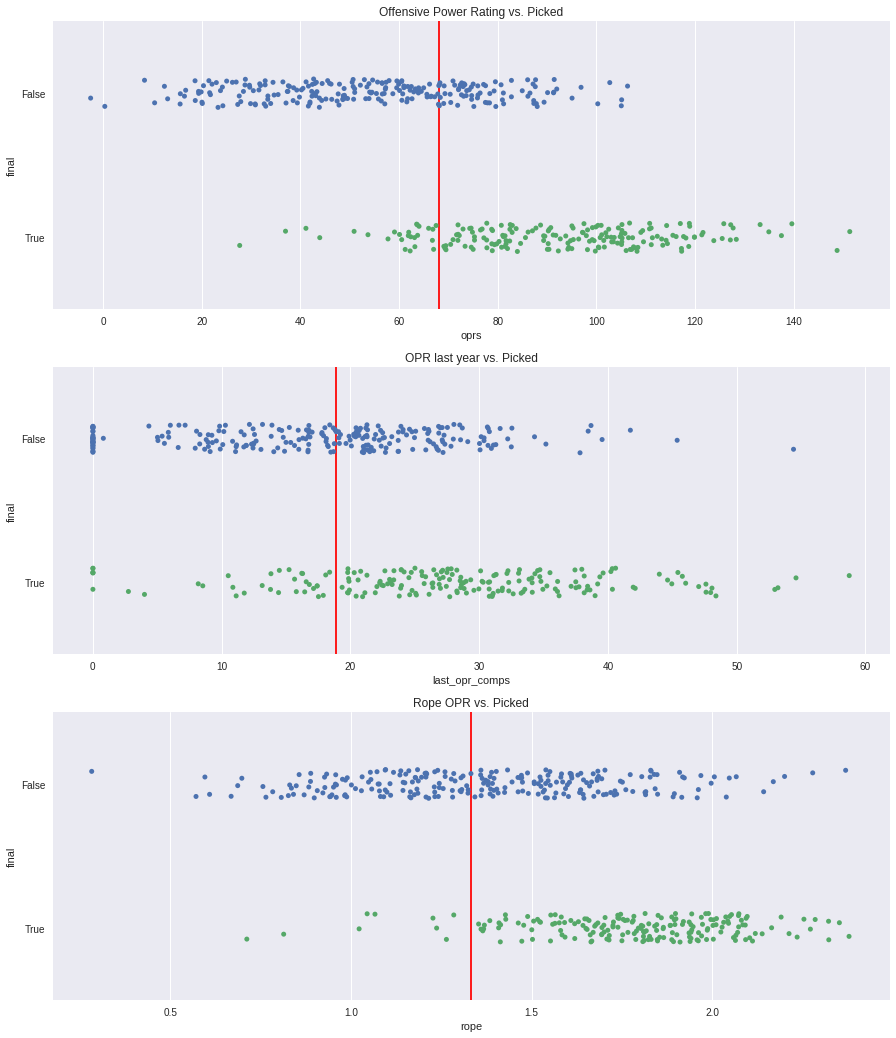

In [15]:
f, axarr = plt.subplots(3, 1, figsize=(15, 18))

p1 = sns.stripplot(y='final', x='oprs', orient="h", jitter=True, data=data, ax=axarr[0])

axarr[0].set_title('Offensive Power Rating vs. Picked')
x = axarr[0].get_ylim()
p1.plot(len(x) * [68], x, color='red')


p2 = sns.stripplot(y='final', x='last_opr_comps', orient="h", jitter=True, data=data, ax=axarr[1])

axarr[1].set_title('OPR last year vs. Picked')
x2 = axarr[1].get_ylim()
p2.plot(len(x2) * [18.8979], x2, color='red')


p3 = sns.stripplot(y='final', x='rope', orient="h", jitter=True, data=data, ax=axarr[2])

axarr[2].set_title('Rope OPR vs. Picked')
x3 = axarr[2].get_ylim()
p3.plot(len(x3) * [1.33226], x3, color='red')



plt.show()

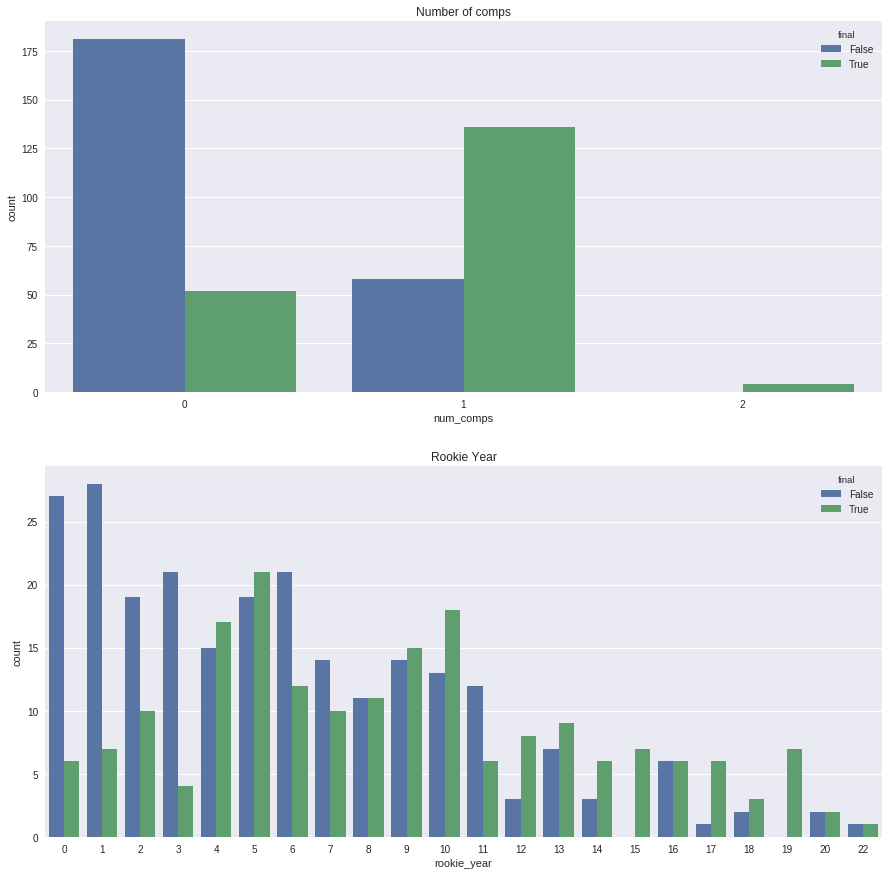

In [16]:
f, axarr = plt.subplots(2, 1, figsize=(15, 15))
sns.countplot(x='num_comps', hue='final', data=data, ax=axarr[0])
sns.countplot(x='rookie_year', data=data, hue='final', ax=axarr[1])

axarr[0].set_title('Number of comps')
axarr[1].set_title('Rookie Year')


plt.show()

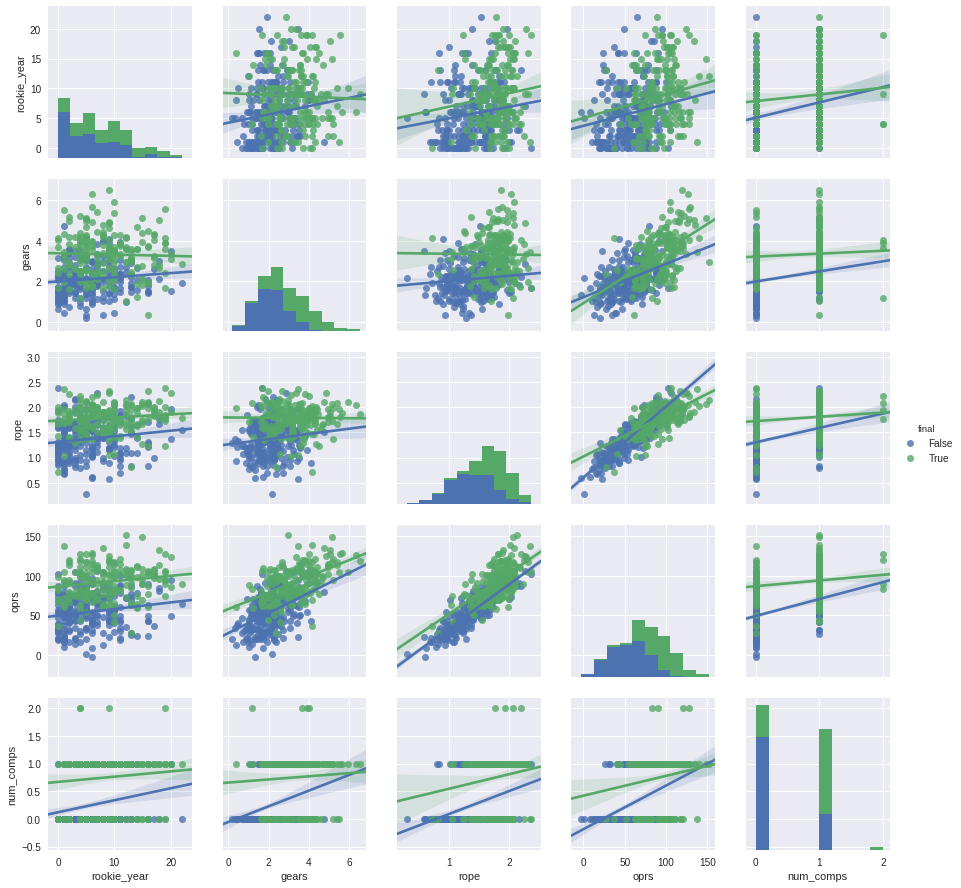

In [17]:
sns.pairplot(data, vars=['rookie_year', 'gears', 'rope', 'oprs', 'num_comps'], hue='final', kind="reg")
plt.show()